# Maternal Health Risk Prediction

### A Comparative Study of Machine Learning Model Performance

---

## Summary

This project aims to use machine learning to predict maternal health risk based on key physiological factors by comparing the performances between two models. Maternal health are a major concern in healthcare. Hence, early risk assessment is crucial for the welfare of both the mother and child. By leveraging structured data from the Maternal Health Risk Dataset, we trained and evaluated machine learning models to classify maternal health risk levels into three different classes: low, mid, and high risk.

The dataset contains 1,014 records with features such as age, blood pressures, blood sugar levels, body temperature and heart rate. Our goal will be to determine whether machine learning algorithms could accurately predict risk levels based on these physiological markers. We will first conduct an exploratory data analysis before building any of the models. Once we have trained the models, their accuracies will be evaluated as measures of performance.

---

## Introduction


Maternal health can be defined as "the health condition of women during preganancy, childbirth, and the postnatal period (WHO, 2025). This is a critical area of healthcare, as complications during preganancy and childbirth can lead to severe consequences for both mothers and newborns. According to the World Health Organization (2024), around 800 women died each day in 2020 due to preventable causes related to maternal health, further emphasizing the need for risk assessment measures. 

Historically, risk assessment have been carried out by medical professionals that relied heavily on clinical expertise and constant monitoring. However, traditional approaches to monitoring basic physiological indicators often lacked efficiency in identifying potential complications (Mu et al., 2023). Since the boom of machine learning (ML), many members of the academe have explored the use of ML in maternal health risk prediction, offering data-driven approaches to enhance early detection and intervention to offload the burden on overworked medical professionals (Mu et al., 2023; Ukrit et al., 2024; Bajaj et al., 2023).

To contribute to this discourse, this research aims to conduct a comparative study on the performance of two ML techniques in predicting maternal health risk, assessing each model's reliability in identifying risk levels.

The analysis will utilize the [Maternal Health Risk](https://archive.ics.uci.edu/dataset/863/maternal+health+risk) dataset sourced from the UC Irvine Machine Learning Repository. Consisting of 1014 observations, this dataset includes the following 7 features:

- `Age`: Age of the patient (in years).
- `SystolicBP`: Systolic Blood Pressure (mmHg).
- `DiastolicBP`: Diastolic Blood Pressure (mmHg).
- `BS (Blood Sugar Level)`: Blood sugar concentration (mmol/L).
- `BodyTemp`: Body temperature (°F).
- `HeartRate`: Heart rate (beats per minute).
- `RiskLevel`: The target variable, categorized into low risk, mid risk, and high risk.

---

## Methods


For this analysis, the data will first be loaded into the notebook then cleaned to handle any possible missing values and ensure its usability for the various models. Following the data cleaning stabe will be an exploratory data analysis (EDA) to gain a comprehensive view of the data. This step will include visualizing the summary statistics, distributions, and correlations between variables to determine any patterns in the data prior to the model development.

This study will implement 2 ML classification models:
1. Logistic Regression
2. Random Forest

Each model will be evaluated based on the appropriate classification metric to compare their relative performance in maternal health risk prediction. 

### Importing Relevant Libraries

In [ ]:
library(tidyverse)
library(corrplot)
library(nnet)
library(caret)
library(randomForest)
library(broom)
library(grid)
library(gridExtra)
library(vip)  

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.95 loaded

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin



Attaching package: ‘gridExtra’


The following object is masked from ‘pac

### Reading the Data
The [dataset](https://archive.ics.uci.edu/dataset/863/maternal+health+risk) was downloaded from the UC Irvine Machine Learning Repository and uploaded to the project's repository from which it is read for the analysis.

In [2]:
data <- read_csv("data/Maternal Health Risk Data Set.csv")

cat("\n\033[1mTable 1: Sample of Raw Data\033[0m\n\n")
head(data)


Rows: 1014 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): RiskLevel
dbl (6): Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Table 1: Sample of Raw Data



Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
25,130,80,15.00,98,86,high risk
35,140,90,13.00,98,70,high risk
29,90,70,8.00,100,80,high risk
30,140,85,7.00,98,70,high risk
35,120,60,6.10,98,76,low risk
23,140,80,7.01,98,70,high risk


### Wrangling and Cleaning the Data
From the tibble below, we find that there are no NA or null values in our dataset.

In [3]:
tibble(feature = names(data), na = colSums(is.na(data)))

feature,na
<chr>,<dbl>
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


The code below shows that the features `Age`, `SystolicBP`, `DiastolicBP`, `BS`, `BodyTemp`, and `HeartRate` are numeric variables, while `RiskLevel` is currently a character variable. Moreover, there are three categories under `RiskLevel`: high risk, mid risk, and low risk

In [4]:
str(data)
data %>% distinct(RiskLevel)

spc_tbl_ [1,014 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Age        : num [1:1014] 25 35 29 30 35 23 23 35 32 42 ...
 $ SystolicBP : num [1:1014] 130 140 90 140 120 140 130 85 120 130 ...
 $ DiastolicBP: num [1:1014] 80 90 70 85 60 80 70 60 90 80 ...
 $ BS         : num [1:1014] 15 13 8 7 6.1 7.01 7.01 11 6.9 18 ...
 $ BodyTemp   : num [1:1014] 98 98 100 98 98 98 98 102 98 98 ...
 $ HeartRate  : num [1:1014] 86 70 80 70 76 70 78 86 70 70 ...
 $ RiskLevel  : chr [1:1014] "high risk" "high risk" "high risk" "high risk" ...
 - attr(*, "spec")=
  .. cols(
  ..   Age = col_double(),
  ..   SystolicBP = col_double(),
  ..   DiastolicBP = col_double(),
  ..   BS = col_double(),
  ..   BodyTemp = col_double(),
  ..   HeartRate = col_double(),
  ..   RiskLevel = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


RiskLevel
<chr>
high risk
low risk
mid risk


Given the three distinct categories under the target feature, we will modify `RiskLevel` to a factor variable to appropriately reflect its categorical nature in further analysis. 

In [5]:
data_clean <- data %>% 
    mutate(RiskLevel = factor(RiskLevel, levels = c("low risk", "mid risk", "high risk")))

cat("\n\033[1mTable 2: Sample of Clean Data\033[0m\n\n")

head(data_clean)


Table 2: Sample of Clean Data



Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
25,130,80,15.00,98,86,high risk
35,140,90,13.00,98,70,high risk
29,90,70,8.00,100,80,high risk
30,140,85,7.00,98,70,high risk
35,120,60,6.10,98,76,low risk
23,140,80,7.01,98,70,high risk


### EDA

#### Summary Statistics

In [6]:
summary(data_clean)

      Age          SystolicBP     DiastolicBP           BS        
 Min.   :10.00   Min.   : 70.0   Min.   : 49.00   Min.   : 6.000  
 1st Qu.:19.00   1st Qu.:100.0   1st Qu.: 65.00   1st Qu.: 6.900  
 Median :26.00   Median :120.0   Median : 80.00   Median : 7.500  
 Mean   :29.87   Mean   :113.2   Mean   : 76.46   Mean   : 8.726  
 3rd Qu.:39.00   3rd Qu.:120.0   3rd Qu.: 90.00   3rd Qu.: 8.000  
 Max.   :70.00   Max.   :160.0   Max.   :100.00   Max.   :19.000  
    BodyTemp        HeartRate        RiskLevel  
 Min.   : 98.00   Min.   : 7.0   low risk :406  
 1st Qu.: 98.00   1st Qu.:70.0   mid risk :336  
 Median : 98.00   Median :76.0   high risk:272  
 Mean   : 98.67   Mean   :74.3                  
 3rd Qu.: 98.00   3rd Qu.:80.0                  
 Max.   :103.00   Max.   :90.0                  

#### Distributions

Since age is an important factor in maternal health, we visualize the age distribution by risk level. From the visualization, high risk individuals have a higher median age around 35 years old. Additionally, the interquartile range indicates that the high risk group has more variation in age. We observe some outliers in the low and mid risk groups. Based on the visualization, older aged individuals seem more associated with maternal health risks. 

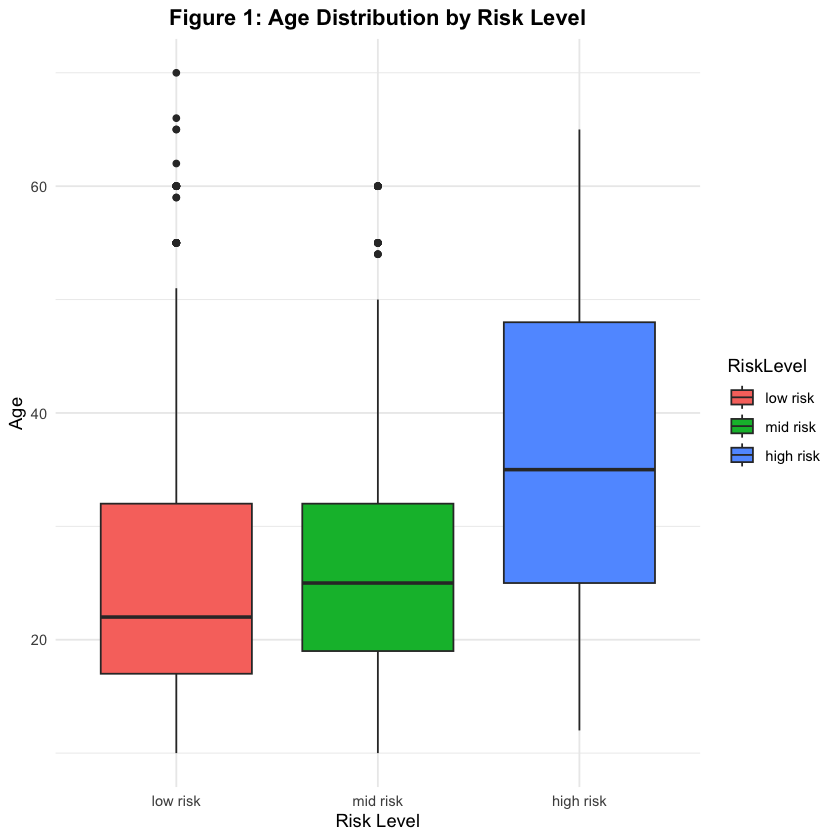

In [7]:
ggplot(data_clean, aes(x = RiskLevel, y = Age, fill = RiskLevel)) +
  geom_boxplot() +
  theme_minimal() +
  labs(
    title = "Figure 1: Age Distribution by Risk Level", 
    x = "Risk Level",
    y = "Age"
  ) +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

Since the target classes seem relatively balanced, it would be appropriate to use **accuracy** as the main scoring metric. Accuracy is given by the number correct prediction out of all predictions made

#### Correlation Matrix

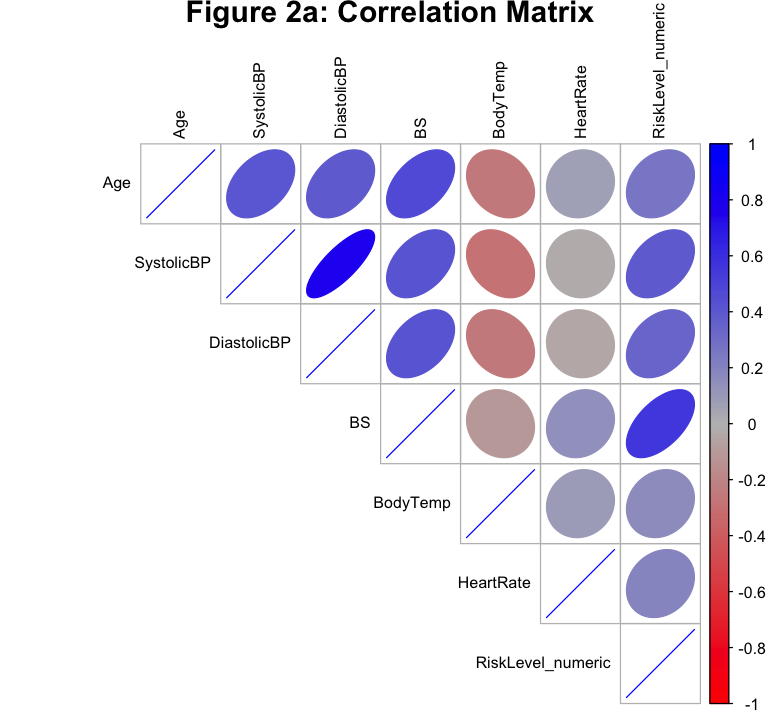

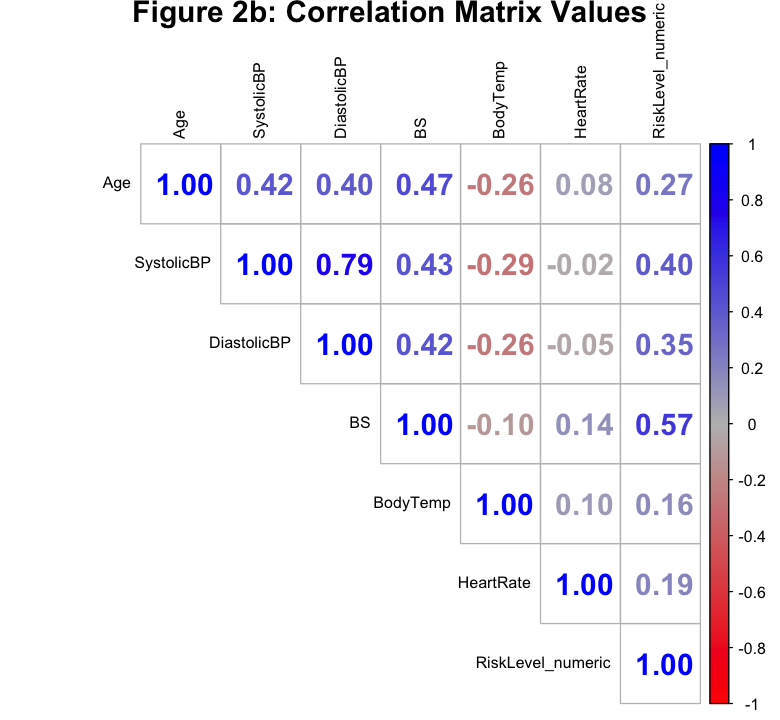

In [44]:
# Temporarily change RiskLevel to numerical values (3 = high risk, 2 = mid risk, 1 = low risk)
data_numeric <- data_clean %>%
  mutate(RiskLevel_numeric = as.numeric(RiskLevel)) %>%
  select(-RiskLevel)

cor_matrix <- cor(data_numeric)

options(repr.plot.width=6.5, repr.plot.height=6) 

corrplot(cor_matrix, method = "ellipse", type = "upper", tl.cex = 0.8, tl.col = "black",
    col = colorRampPalette(c("red", "grey", "blue"))(200))
mtext("Figure 2a: Correlation Matrix", side = 3, line = 3, cex = 1.5, font = 2)


corrplot(cor_matrix, method = "number", type = "upper", number.cex = 1.5, tl.cex = 0.8, tl.col = "black",
    col = colorRampPalette(c("red", "grey", "blue"))(200))
mtext("Figure 2b: Correlation Matrix Values", side = 3, line = 3, cex = 1.5, font = 2)


All of the variables have a positive correlation with RiskLevel, indicating that increases in these variables generally correspond to a higher maternal health risk. BS (Blood Sugar level) has the strongest correlation of 0.57, suggesting it is likely to be the most influential factor. We thought age would have a stronger correlation with RiskLevel, however, systolic blood pressure and diastolic blood pressure seems to have a stronger correlation with RiskLevel than age. Additionally, there are no signs of concern for multicollinearity issues in this dataset.

These findings may be a possible reason for the outliers observed above. Younger individuals with high blood pressures or sugar levels may be classified into higher risk levels. This indicates the importance of other factors.

## Classification Model Building

### Train/Test Splitting

In [9]:
set.seed(123)

# Create an 80% training and 20% testing split
train_index <- createDataPartition(data_clean$RiskLevel, p = 0.8, list = FALSE)

# Subset data into training and testing sets
train_data <- data_clean[train_index, ]
test_data  <- data_clean[-train_index, ]

dim(train_data)
dim(test_data)

[1] 812   7

[1] 202   7

### Baseline Classification Model (Majority Class)

In [10]:
majority_class <- names(sort(table(train_data$RiskLevel), decreasing = TRUE))[1]

majority_predictions <- factor(rep(majority_class, nrow(test_data)), 
                               levels = levels(test_data$RiskLevel))

majority_accuracy <- mean(majority_predictions == test_data$RiskLevel)
print(paste("Majority Class Baseline Accuracy:", round(majority_accuracy, 7)))

[1] "Majority Class Baseline Accuracy: 0.4009901"


### Multinomial Logistic Regression

In [11]:
multinom_logistic <- multinom(RiskLevel ~ ., data = train_data)

summary(multinom_logistic)
cat("\n\033[1mTable 3: Exponentiated coefficients to transform log-odds to odds ratio\033[0m\n\n")

multinom_logistic %>%
    tidy(exp = TRUE)

# weights:  24 (14 variable)
initial  value 892.073178 
iter  10 value 731.740084
iter  20 value 651.225981
iter  30 value 618.926897
iter  40 value 618.918226
iter  50 value 618.750052
final  value 618.748469 
converged


Call:
multinom(formula = RiskLevel ~ ., data = train_data)

Coefficients:
          (Intercept)          Age SystolicBP DiastolicBP        BS  BodyTemp
mid risk    -51.45546 -0.003381834 0.06674558 -0.04451933 0.3392350 0.4283579
high risk  -102.69736 -0.022647143 0.07188222  0.01910705 0.7532347 0.8265515
           HeartRate
mid risk  0.03462081
high risk 0.07073450

Std. Errors:
           (Intercept)         Age  SystolicBP DiastolicBP         BS
mid risk  0.0001767925 0.007943439 0.008090217  0.01065454 0.08396116
high risk 0.0001486341 0.012346374 0.011886866  0.01509759 0.08939212
            BodyTemp  HeartRate
mid risk  0.01314433 0.01283421
high risk 0.01702684 0.01643069

Residual Deviance: 1237.497 
AIC: 1265.497 


Table 3: Exponentiated coefficients to transform log-odds to odds ratio



y.level,term,estimate,std.error,statistic,p.value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
mid risk,(Intercept),4.499616e-23,0.0001767925,-2.910500e+05,0.000000e+00
mid risk,Age,9.966239e-01,0.0079434388,-4.257393e-01,6.702978e-01
mid risk,SystolicBP,1.069023e+00,0.0080902171,8.250159e+00,1.581837e-16
mid risk,DiastolicBP,9.564571e-01,0.0106545368,-4.178439e+00,2.935164e-05
mid risk,BS,1.403873e+00,0.0839611630,4.040380e+00,5.336475e-05
mid risk,BodyTemp,1.534735e+00,0.0131443256,3.258880e+01,5.909370e-233
mid risk,HeartRate,1.035227e+00,0.0128342069,2.697542e+00,6.985345e-03
high risk,(Intercept),2.506703e-45,0.0001486341,-6.909407e+05,0.000000e+00
high risk,Age,9.776074e-01,0.0123463741,-1.834315e+00,6.660720e-02


In [12]:
test_predictions <- predict(multinom_logistic, newdata = test_data)

# predict probabilities
test_probabilities <- predict(multinom_logistic, newdata = test_data, type = "probs")
head(test_predictions)
cat("\n\033[1mTable 4: Predicted Probabilities for Test\033[0m\n\n")
head(test_probabilities)

[1] high risk low risk  mid risk  low risk  low risk  low risk 
Levels: low risk mid risk high risk


Table 4: Predicted Probabilities for Test



,low risk,mid risk,high risk
1,0.00227716,0.08505357,0.91266927
2,0.49794075,0.35319560,0.14886365
3,0.38120326,0.59430812,0.02448862
4,0.52108173,0.38810710,0.09081117
5,0.68201782,0.21871018,0.09927200
6,0.75971265,0.21579223,0.02449511


The multinomial logistic regression has only given us an slightly better accuracy than the baseline, a 0.1782178 better score than the baseline model 

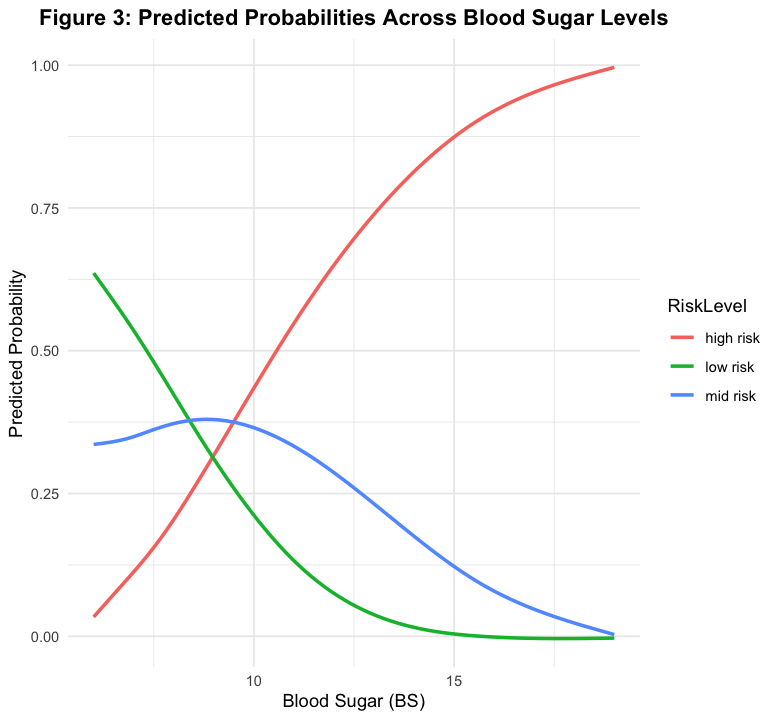

In [45]:
# Blood sugar graph

pred_probs <- predict(multinom_logistic, newdata = test_data, type = "probs")

prob_data <- as.data.frame(pred_probs)
prob_data$BS <- test_data$BS  

prob_long <- pivot_longer(prob_data, cols = c("low risk", "mid risk", "high risk"), 
    names_to = "RiskLevel", values_to = "Probability")


ggplot(prob_long, aes(x = BS, y = Probability, color = RiskLevel)) +
  geom_smooth(method = "gam", formula = y ~ s(x, bs = "cs"), span = 0.3, se = FALSE, size = 1) +  
  theme_minimal() +
  labs(title = "Figure 3: Predicted Probabilities Across Blood Sugar Levels",
       x = "Blood Sugar (BS)",
       y = "Predicted Probability") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))


Lastly, we plot multinomial logistic regression graphs to visualize how predicted probabilities changes among different variable levels. We observe that as blood sugar level rises the probability of high risk increases, while mid and low risk decreases. 

### Random Forest

In [16]:
rf_model <- randomForest(RiskLevel ~ ., data = train_data, ntree = 500, importance = TRUE)
print(rf_model)


Call:
 randomForest(formula = RiskLevel ~ ., data = train_data, ntree = 500,      importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 16.38%
Confusion matrix:
          low risk mid risk high risk class.error
low risk       267       50         8  0.17846154
mid risk        40      213        16  0.20817844
high risk        6       13       199  0.08715596


Here are the parameters that have been passed through the randomForest object:
- `RiskLevel ~ .`: Predicts RiskLevel based on all other features
- `ntree = 500`: Uses 500 trees in the forest
- `importance` = TRUE: Computes feature importance

Now that the model is trained using our train set. Let's make predictions on the test set

In [43]:
rf_predictions <- predict(rf_model, test_data)


With the random forest model, we can also assess feature importances.

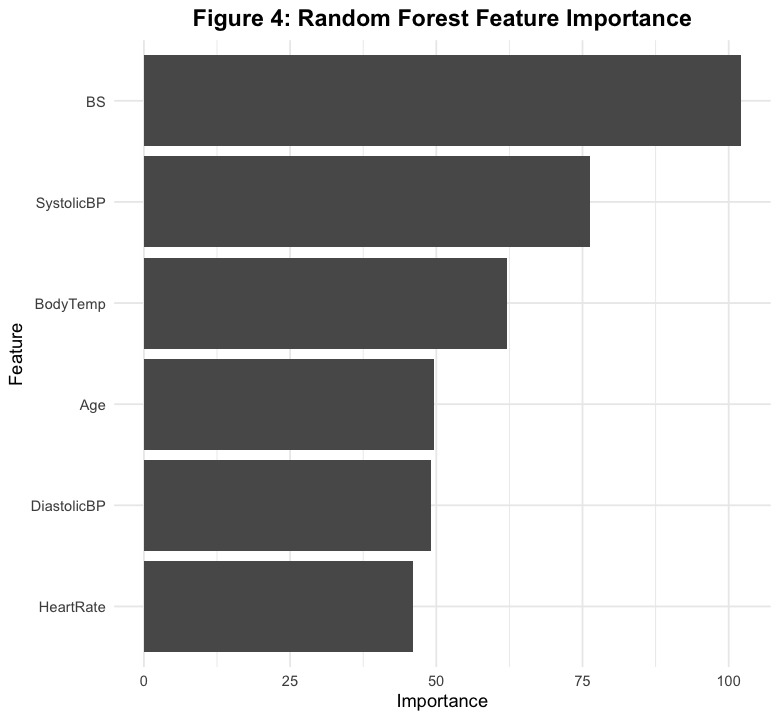

In [46]:
vip(rf_model) + 
labs (title = 'Figure 4: Random Forest Feature Importance', x = "Feature", y = "Importance") +
theme_minimal() +  
theme(plot.title = element_text(hjust = 0.5, face = "bold", size = 14)) 

Based on the graph above, we see that the model identifies blood sugar, systolic blood pressure, and body temperature as the top predictors of maternal health risk (i.e., have the most predictive power). With blood sugar specifically, we see that it's feature importance reaches over 100 indicating that it is highly influential in predicting maternal health risk compared to the other features. 

## Results

### Baseline Model

In [63]:
base_conf_matrix <- confusionMatrix(as.factor(majority_predictions), as.factor(test_data$RiskLevel))

base_table <- as.data.frame(base_conf_matrix$table)

colnames(base_table) <- c("True", "Predicted", "Frequency")

base_table <- base_table %>%
  group_by(True) %>%
  mutate(Percentage = ifelse(sum(Frequency) == 0, 0, round((Frequency / sum(Frequency)) * 100, 1)))
cat("\n\033[1mTable 5: Baseline Confusion Matrix\033[0m\n\n")
base_table

options(repr.plot.width=7, repr.plot.height=6) 

base_visualization <- ggplot(base_table, aes(x = True, y = Predicted, fill = Frequency)) +
  geom_tile(color = "black") +  # Draw tiles
  geom_text(aes(label = paste0(Frequency, "\n(", Percentage, "%)")), color = "black", size = 6) +  # Add labels
  scale_fill_gradient(low = "white", high = "red") +  # Color scale
  labs(title = "Baseline",
       x = "True Label", y = "Predicted Label") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))


Table 5: Baseline Confusion Matrix



True,Predicted,Frequency,Percentage
<fct>,<fct>,<int>,<dbl>
low risk,low risk,81,40.1
mid risk,low risk,0,0.0
high risk,low risk,0,0.0
low risk,mid risk,67,40.1
mid risk,mid risk,0,0.0
high risk,mid risk,0,0.0
low risk,high risk,54,40.1
mid risk,high risk,0,0.0
high risk,high risk,0,0.0


### Logistic Regression

In [64]:
lr_conf_matrix <- confusionMatrix(as.factor(test_predictions), as.factor(test_data$RiskLevel))

cm_table <- as.data.frame(lr_conf_matrix$table)

colnames(cm_table) <- c("True", "Predicted", "Frequency")

cm_table <- cm_table %>%
  group_by(True) %>%
  mutate(Percentage = round((Frequency / sum(Frequency)) * 100, 1))  # Round to 1 decimal place
cat("\n\033[1mTable 6: Logistic Regression Confusion Matrix\033[0m\n\n")
cm_table

options(repr.plot.width=7, repr.plot.height=6) 

lr_visualization <- ggplot(cm_table, aes(x = True, y = Predicted, fill = Frequency)) +
  geom_tile(color = "black") +  # Draw tiles
  geom_text(aes(label = paste0(Frequency, "\n(", Percentage, "%)")), color = "black", size = 6) +  # Add labels
  scale_fill_gradient(low = "white", high = "green") +  # Color scale
  labs(title = "Logistic Regression",
       x = "True Label", y = "Predicted Label") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))



Table 6: Logistic Regression Confusion Matrix



True,Predicted,Frequency,Percentage
<fct>,<fct>,<int>,<dbl>
low risk,low risk,62,58.5
mid risk,low risk,16,42.1
high risk,low risk,3,5.2
low risk,mid risk,41,38.7
mid risk,mid risk,13,34.2
high risk,mid risk,13,22.4
low risk,high risk,3,2.8
mid risk,high risk,9,23.7
high risk,high risk,42,72.4


### Random Forest

In [65]:
rf_conf_matrix <- confusionMatrix(rf_predictions, test_data$RiskLevel)

conf_matrix_df <- as.data.frame(rf_conf_matrix$table)

rf_table <- as.data.frame(rf_conf_matrix$table)

colnames(rf_table) <- c("True", "Predicted", "Frequency")

rf_table <- rf_table %>%
  group_by(True) %>%
  mutate(Percentage = round((Frequency / sum(Frequency)) * 100, 1))  # Round to 1 decimal place
cat("\n\033[1mTable 7: Random Forest Confusion Matrix\033[0m\n\n")
rf_table

options(repr.plot.width=7, repr.plot.height=6) 
rf_visualization <- ggplot(rf_table, aes(x = True, y = Predicted, fill = Frequency)) +
  geom_tile(color = "black") +  
  scale_fill_gradient(low = "white", high = "blue") + 
  geom_text(aes(label = paste0(Frequency, "\n(", Percentage, "%)")), color = "black", size = 6) +  
  labs(title = "Random Forest",
       x = "True Label", y = "Predicted Label") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))


Table 7: Random Forest Confusion Matrix



True,Predicted,Frequency,Percentage
<fct>,<fct>,<int>,<dbl>
low risk,low risk,69,78.4
mid risk,low risk,9,16.1
high risk,low risk,3,5.2
low risk,mid risk,17,19.3
mid risk,mid risk,45,80.4
high risk,mid risk,5,8.6
low risk,high risk,2,2.3
mid risk,high risk,2,3.6
high risk,high risk,50,86.2


### Comparison of Results

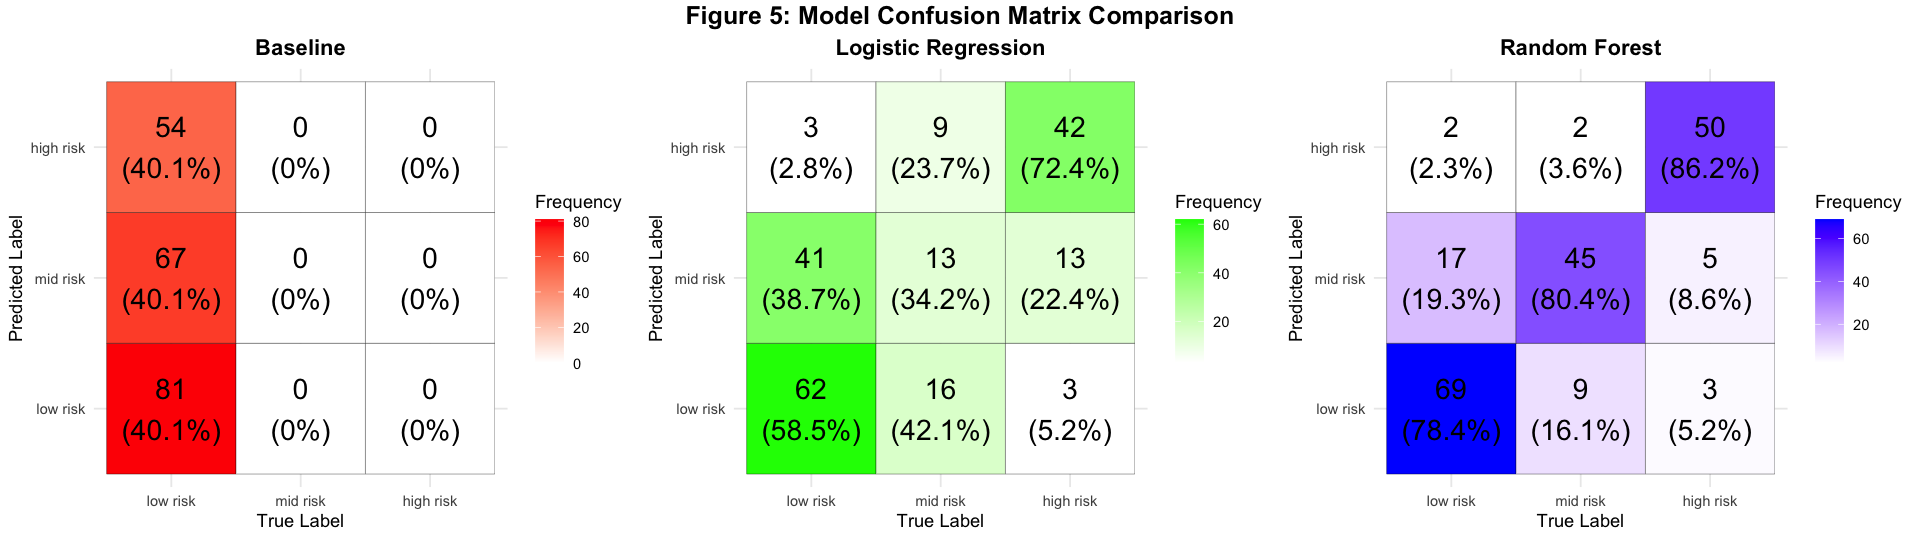

In [71]:
options(repr.plot.width=16, repr.plot.height=4.5) 
grid.arrange(base_visualization, lr_visualization, rf_visualization, nrow = 1, top = textGrob("Figure 5: Model Confusion Matrix Comparison",gp=gpar(fontsize=15,font=2)))

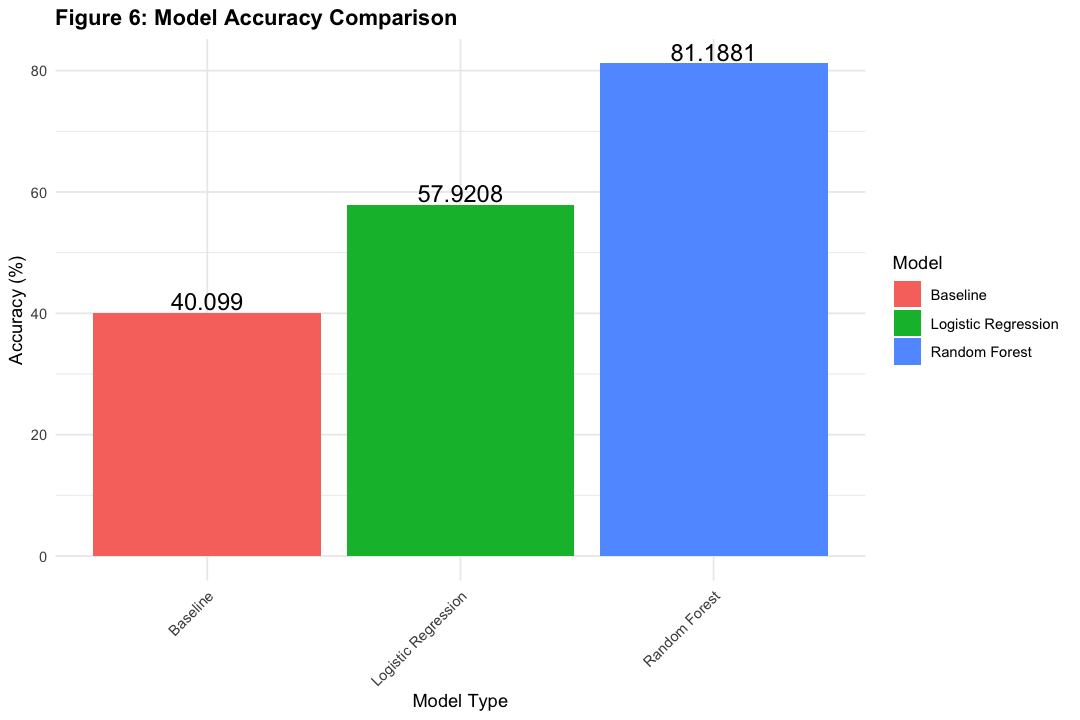

In [70]:
accuracy_table <- data.frame(
  Model = c("Baseline", "Logistic Regression", "Random Forest"),
  Accuracy = c(base_conf_matrix$overall["Accuracy"], 
               lr_conf_matrix$overall["Accuracy"], 
               rf_conf_matrix$overall["Accuracy"])
)

accuracy_table$Accuracy <- accuracy_table$Accuracy * 100

options(repr.plot.width=9, repr.plot.height=6) 
ggplot(accuracy_table, aes(x = Model, y = Accuracy, fill = Model)) +
  geom_bar(stat = "identity") +  
  geom_text(aes(label = round(Accuracy, 4)), vjust = -0.2, size = 5) +
  labs(title = "Figure 6: Model Accuracy Comparison", x = "Model Type", y = "Accuracy (%)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), 
  plot.title = element_text(face = "bold"))  


Random Forest has yielded 0.8118812 score. 0.2326733 better accuracy than the multinomial logistic regression and 0.4108911 better accuracy than the baseline model

---

## Discussion


### Best performing model
As shown in the bar graph above, our analyses suggest that maternal health risk during pregnancy can be predicted with up to a 81.19% accuracy using our random forests decision trees model. The second best model was the multinomial logistic regression that had a 57.92% accuracy. Both models performed better than the baseline (40.10%). Both models performing better than the baseline is expected as well as the random forest performing better than the logistic regression as past literature have found similar results (Mu et al., 2023; Ukrit et al., 2024).

### Interpretation
The multinomial logistic regression, while less accurate, is more interpretable and gives us an idea of how a 1-unit increase in a variable is associated with a change in the odds of being in a certain risk category. For example, the multinomial logistic regression suggests that a 1 unit increase in Blood Sugar level is associated with an increase in the odds of being in "`high risk` compared to `low risk` by a factor of 2.13. 

The best predictors for `high risk` compared to `low risk` were body temperature ($OR$ = 2.29, $p$ < .001) and blood sugar ($OR$ = 2.13, $p$ < .001). A one unit increase in both was associated with a more than double increase in the odds of being in the `high risk` category.

The best predictors for `medium risk` compared to `low risk` were also body temperature ($OR$ = 1.53, $p$ < .001) and blood sugar ($OR$ = 1.40, $p$ < .001). The odds are 

Both the multinomial logistic regression model and the Random Forest model performed best when predicting `high risk`. 

### Impact
Our analyses show that body temperature and blood sugar are both relatively strongly associated with increasing maternal health risk. We do however acknowledge that our models do not necessarily imply a causal effect such that reducing blood sugar or body temperature will reduce your maternal health risk. Additionally, our models are limited by the number of variables we accounted for. Other factors such as age, parental health conditions, and many more would improve the generalizability of our models. 

Our analyses should therefore not be used as guidelines for pregnant mothers. Now that we have have further evidence that blood sugar and body temperature are associated with maternal health risk, future research could explore the potential causal mechanism of these relationships. Future research may also explore whether this effect remains constant across age or whether certain age groups are more susceptible to the effects of blood sugar/body temperature on maternal health risk. 

---

## References

Ahmed, M. (2020). Maternal Health Risk [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DP5D.

Bajaj, D., Kumari, R., & Bansal, P. (2023). Risk level prediction for maternal health using machine learning algorithms. 2023 International Conference on Communication, Security and Artificial Intelligence (ICCSAI), 405–409. https://doi.org/10.1109/iccsai59793.2023.10421156 

Mu, C., Yan, Z., & Zhu, Y. (2023). Prediction of maternal health risk based on physiological indicators. Proceedings of the 2023 4th International Symposium on Artificial Intelligence for Medicine Science, 578–584. https://doi.org/10.1145/3644116.3644212 

Ukrit, M. F., Jeyavathana, R. B., Rani, A. L., & Chandana, V. (2024). Maternal health risk prediction with machine learning methods. 2024 Second International Conference on Emerging Trends in Information Technology and Engineering (ICETITE), 1–9. https://doi.org/10.1109/ic-etite58242.2024.10493737 

World Health Organization. (2024, April 26). Maternal mortality. World Health Organization. https://www.who.int/news-room/fact-sheets/detail/maternal-mortality 

World Health Organization. (2025). Maternal health. World Health Organization. https://www.who.int/health-topics/maternal-health#tab=tab_1 